# Crash Course Part B
By Jainam Mehta (NEU ID: 002784342)

# Example 1

# FER2013_CNN_LSTM

Facial Emotion Recognition with using CNN
Facial expressions are one of the ways humans communicate. Deep learning approaches in human and computer interactions are used in artificial intelligence research as an effective system application process. The detection of emotions or facial expressions in psychology necessitates the examination and evaluation of decisions in anticipating a person's feelings or a group of people communicating. This study proposes the development of a system that can predict and recognize the classification of facial emotions using the Convolution Neural Network (CNN) algorithm and feature extraction.

Data preprocessing, facial feature extraction, and facial emotion classification are the three key steps in the notebook. Facial expressions were predicted with the accuracy of 62.66 percent with using the Convolutional Neural Network (CNN). This algorithm was evaluated on a publicly available dataset from the FER2013 database, which has 35887 48x48 grayscale face images each representing one of the emotions.

# 1. Importing necessary libraries

In [1]:
%%capture
!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. Loading the data

In [3]:
data = pd.read_csv("../input/fer2013/fer2013.csv")
data.shape

(35887, 3)

To see the dataset has any missing values.

In [4]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# 3. Data pre-processing

Data preprocessing is a crucial step in machine learning, where raw data is transformed into a format that is suitable for training a machine learning model. The purpose of data preprocessing is to clean, transform, and standardize the data so that it can be effectively used by a machine learning algorithm.

Data preprocessing usually involves the following steps:

1. Data cleaning: This involves removing any irrelevant data, dealing with missing or erroneous values, and handling outliers.
2. Data transformation: This involves converting the data into a suitable format for machine learning algorithms. For example, converting categorical data into numerical data, scaling the data to a common range, and normalizing the data to have zero mean and unit variance.
3. Feature extraction: This involves selecting relevant features from the dataset, which can help to improve the accuracy and efficiency of the model.
4. Splitting the data into training and testing sets: This involves dividing the dataset into two subsets: one for training the model and the other for testing the model's performance.


By performing these steps, data preprocessing can help to improve the accuracy and efficiency of machine learning models, and ensure that they are able to generalize well to new data.

In [6]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


**3.1 Shuffling the data**

Firstly, we will shuffle the data using sample() function and determining fraction as 1 to shuffle the data by changing the rows.

In [7]:
data = data.sample(frac=1)

**3.2 One Hot Encoding**

One hot encoding involves representing each categorical variable or label as a binary vector, where the vector has a length equal to the number of categories in the variable. For example, if there are 5 categories, then each label would be represented as a 5-dimensional binary vector, where only one element is equal to 1 and all other elements are equal to 0.

In the context of CNNs, one hot encoding is used to represent the output labels in a format that can be used by the loss function and the optimizer. In particular, it allows the model to compute the cross-entropy loss between the predicted probability distribution (which is typically represented as a softmax output layer) and the true label distribution (which is represented as a one hot encoded vector).

Then, we will do one hot encoding operation to change the categorical labels as numeric labels to learning algorithm can work better in predictions process.

In [8]:
labels = to_categorical(data[['emotion']], num_classes=7)

Changing image pixels to Numpy array

In [9]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

**3.3 Standardization**

We will change the data structure to feed the standart scaler to implement standardization process to our data. Since StandartScaler() function only takes 2 dimensional array we will reshape the data then apply our scaler to make the mean zero and standart deviation as unit.

In [10]:
pixels = train_pixels.reshape((35887*2304,1))

In [11]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

**3.4 Reshaping the data (48,48)**


After that, we will reshape the data to make our image pixels ready to split operation.

In [13]:
pixels = train_pixels.reshape((35887, 48, 48,1))

**3.5 Train test validation split**


Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


We can see some train data containing one sample of each class with the help of this plot code.

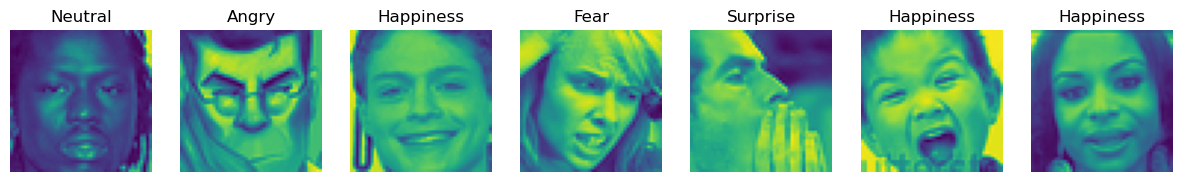

In [16]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

**3.6 Data augmentation using ImageDataGenerator**


We can do data augmentation to have more data to train and validate our model to prevent overfitting. Data augmentation can be done on training and validation sets as it helps the model become more generalize and robust.


In [17]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2) 

This code defines two instances of the ImageDataGenerator class in Keras, which are used to generate batches of image data for training and validation.

The ImageDataGenerator class provides a way to augment and preprocess image data on-the-fly during model training. This is useful for increasing the variability of the training data and preventing overfitting.


In [18]:
datagen.fit(X_train)
valgen.fit(X_val)

In [20]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

Our dataset is ready to feed our model. We will look at our model architecture.

# 4. Design a model


**4.1 CNN model**

A Convolutional Neural Network (CNN) is a type of neural network that is primarily used for image recognition and processing tasks. The key feature of CNNs is the use of convolutional layers that can extract image features and learn patterns from the input data. These layers use filters to convolve over the image pixels, producing feature maps that highlight important visual features such as edges, corners, and textures.

CNNs typically also include pooling layers, which downsample the feature maps and reduce the spatial dimensions of the data, as well as fully connected layers, which perform classification on the high-level features learned by the convolutional layers.

During training, CNNs are typically optimized using backpropagation, which updates the weights of the network based on the difference between the predicted outputs and the true outputs.

Overall, CNNs are highly effective for tasks such as object detection, image classification, and facial recognition, and have achieved state-of-the-art performance in many computer vision applications.

CNN model has many layers with different units such as Convolutional layer, Max pooling layer, Batch normalization and Drop out layer to regularize the model.

In [21]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

The first layer is a Conv2D layer with 32 filters of size (3, 3) and a rectified linear unit (ReLU) activation function. The input shape is (48, 48, 1), which corresponds to grayscale images of size 48x48 pixels. The padding argument is set to 'same', which means the input is padded with zeros so that the output has the same shape as the input.

The second layer is another Conv2D layer with 64 filters of size (3, 3) and a ReLU activation function. This layer is followed by batch normalization, max pooling with pool size (2, 2), and a dropout layer with a rate of 0.25.

The next three convolutional layers follow a similar pattern, with increasing numbers of filters and larger filter sizes. The third layer has 128 filters of size (5, 5), the fourth layer has 512 filters of size (3, 3), and the fifth layer has 512 filters of size (3, 3). All of these layers also have batch normalization, max pooling, and dropout.

The output of the final convolutional layer is flattened and fed into two fully connected (dense) layers with ReLU activation functions, each followed by batch normalization and dropout. The output layer is a dense layer with a softmax activation function, which outputs the predicted probabilities for each of the seven possible facial expressions (angry, disgust, fear, happy, sad, surprise, and neutral).

The model is compiled with the Adam optimizer with a learning rate of 0.0001, categorical cross-entropy as the loss function, and accuracy as the evaluation metric. The regularization term kernel_regularizer=regularizers.l2(0.01) is applied to the third, fourth, and fifth convolutional layers to prevent overfitting.

In [22]:
model = cnn_model()

Then, we compile our model with Adam optimizer with 0.0001 learning rate and chose metric as accuracy, then loss as categorical crossentropy

In [23]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

# 4.2 Early stopping

Adding checkpointer to implement Early Stopping to prevent overfitting.

In [25]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

The code creates two callback functions to be used during the training of a machine learning model: EarlyStopping and ModelCheckpoint. EarlyStopping monitors the validation accuracy and stops the training if it doesn't improve after a certain number of epochs. ModelCheckpoint saves the weights of the best model based on the validation accuracy to a file named 'best_model.h5'.





In [27]:
history = model.fit(train_generator,
                    epochs=10,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/10
455/455 [==============================] - ETA: 0s - loss: 6.5506 - accuracy: 0.2140
Epoch 1: val_accuracy improved from -inf to 0.26099, saving model to best_model.h5
455/455 [==============================] - 879s 2s/step - loss: 6.5506 - accuracy: 0.2140 - val_loss: 2.6318 - val_accuracy: 0.2610
Epoch 2/10
455/455 [==============================] - ETA: 0s - loss: 2.4170 - accuracy: 0.2491
Epoch 2: val_accuracy did not improve from 0.26099
455/455 [==============================] - 859s 2s/step - loss: 2.4170 - accuracy: 0.2491 - val_loss: 2.3884 - val_accuracy: 0.2601
Epoch 3/10
455/455 [==============================] - ETA: 0s - loss: 2.5415 - accuracy: 0.3357
Epoch 3: val_accuracy improved from 0.26099 to 0.32632, saving model to best_model.h5
455/455 [==============================] - 852s 2s/step - loss: 2.5415 - accuracy: 0.3357 - val_loss: 2.9002 - val_accuracy: 0.3263
Epoch 4/10
455/455 [==============================] - ETA: 0s - loss: 2.6594 - accuracy: 0.4177


# 4.3 Visualizing results

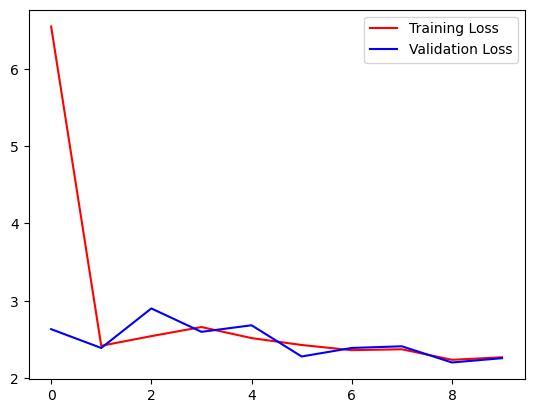

In [28]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

We can observe here thatthe training loss and validation loss drop and comverges at a point and remains constant, ideally its supposed to be less than 1 but havign less epochs and lot of noise we need to preproces more to achieve that  

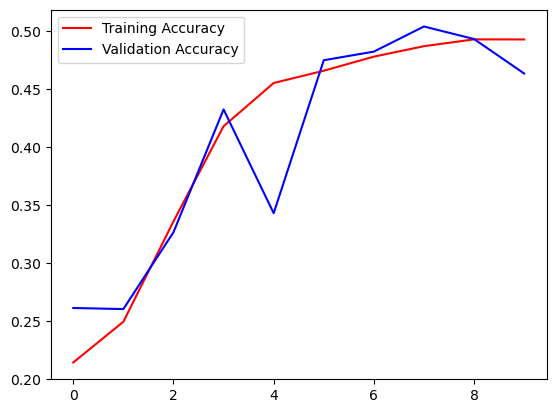

In [29]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

Starting from a low pecrcentage we can see that over the time the accuracy rising above 50%, even though it is less we can say the model has not overfitted and with more preprocessing and adding hypermarameter tuning will increasing accuracy gradually 

In [30]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))


113/113 [==============================] - 21s 185ms/step - loss: 2.1778 - accuracy: 0.5057
Test Acc: 0.5057119131088257


In [31]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 21s 183ms/step


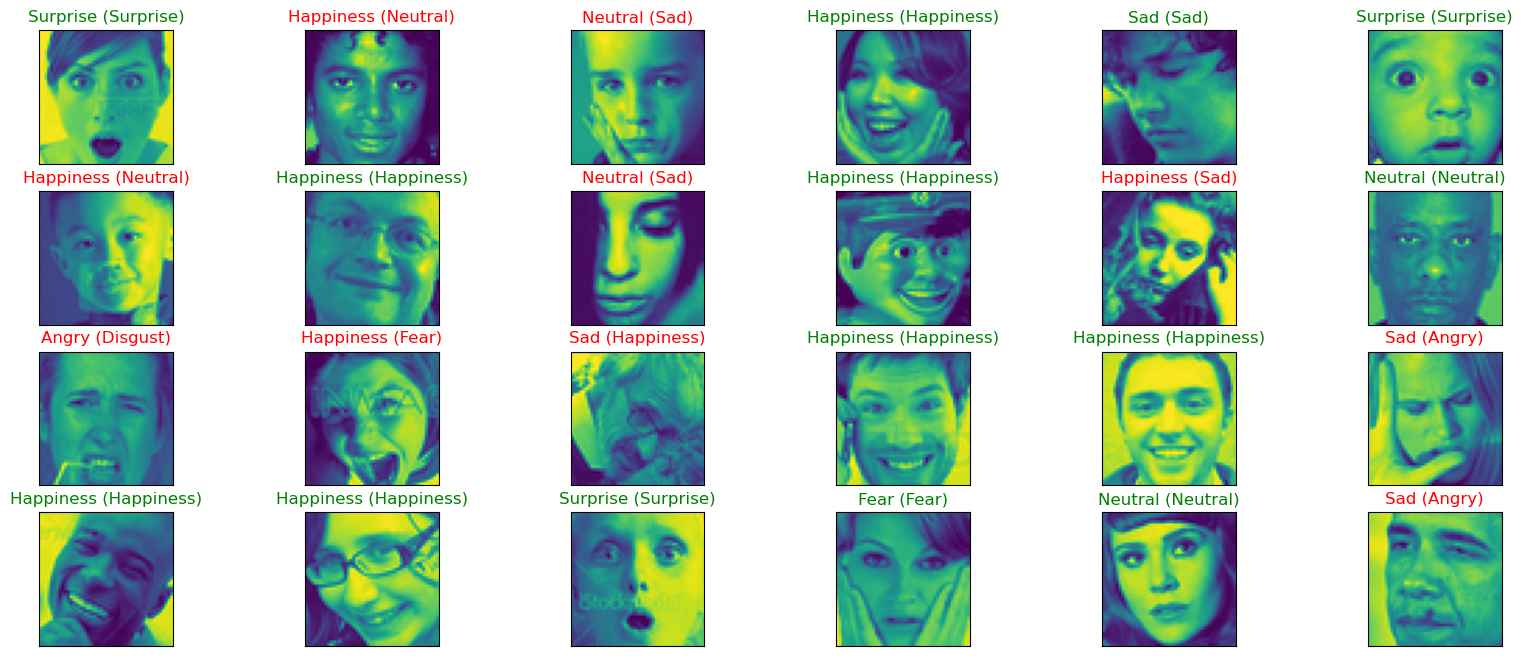

In [32]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

# Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted labels of the model with the actual labels of the data.

The confusion matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) of a classification model. In a binary classification problem, the confusion matrix is a 2x2 table with the following elements:

True Positives (TP): The number of correctly predicted positive instances.
True Negatives (TN): The number of correctly predicted negative instances.
False Positives (FP): The number of incorrectly predicted positive instances.
False Negatives (FN): The number of incorrectly predicted negative instances.


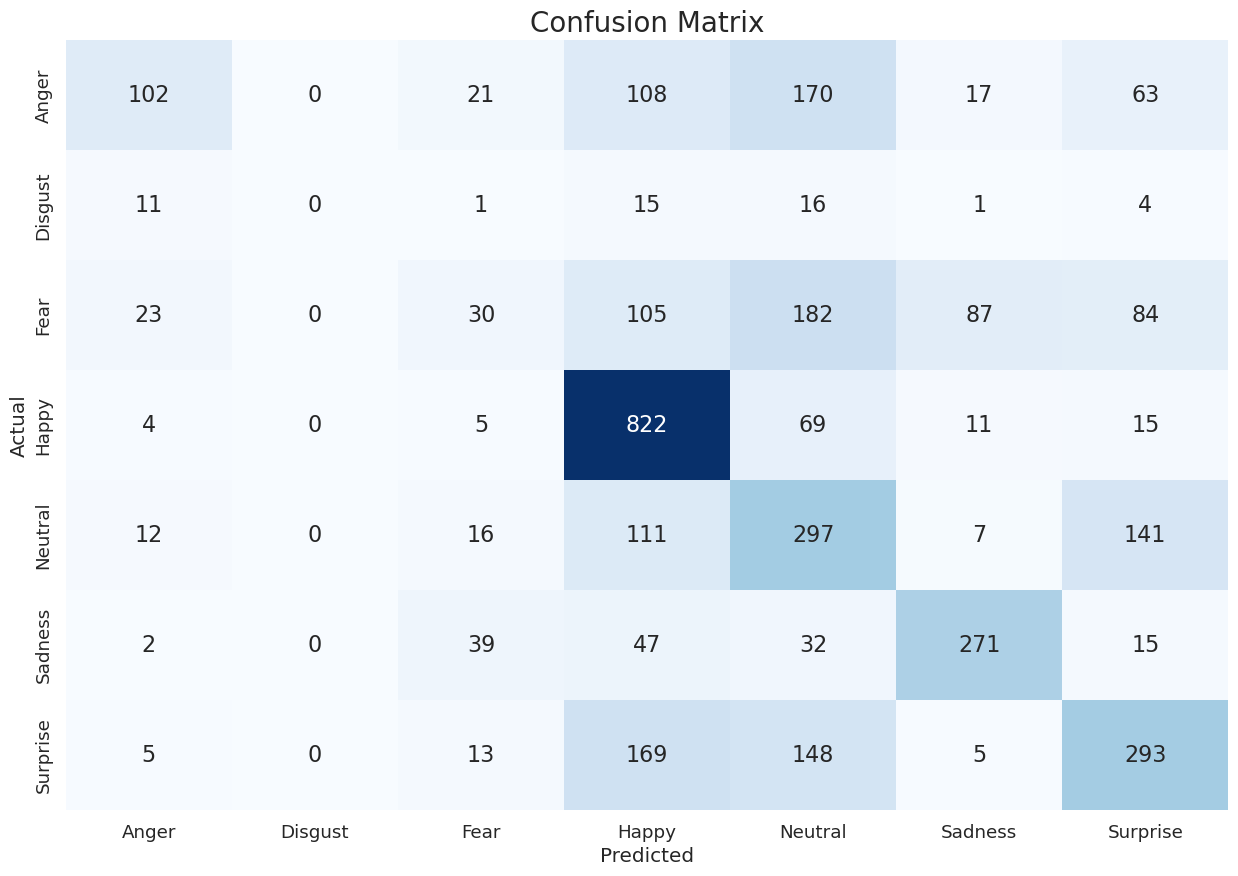

In [38]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.642     0.212     0.319       481
           1      0.000     0.000     0.000        48
           2      0.240     0.059     0.094       511
           3      0.597     0.888     0.714       926
           4      0.325     0.509     0.397       584
           5      0.679     0.667     0.673       406
           6      0.476     0.463     0.470       633

    accuracy                          0.506      3589
   macro avg      0.423     0.400     0.381      3589
weighted avg      0.488     0.506     0.464      3589



# Example 2 - TMNIST using CNN 

# **Abstract**
This Notebook tries to use a simple convolution neural network (CNN) to do image recognition on TMNIST typeface dataset

# **About DataSet**
The Typeface MNIST dataset contains 62 classes, each corresponding to a different alphanumeric character or symbol. The characters are drawn in a variety of fonts and styles, ranging from serif and sans-serif to handwritten and decorative. There are 55,000 training examples and 10,000 test examples in the dataset.

The images in the Typeface MNIST dataset are grayscale, with a resolution of 28 x 28 pixels. Each pixel is represented by an integer value between 0 and 255, where 0 corresponds to black and 255 corresponds to white.

The Typeface MNIST dataset was created to provide a more challenging and realistic benchmark for character recognition tasks than the original MNIST dataset, which has become relatively easy for modern machine learning models to solve. The variety of fonts and styles in the Typeface MNIST dataset makes it more difficult for models to generalize and recognize characters that they have not seen before.

# Importing Required Dependencies

In [40]:
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import urllib.request
import pandas as pd 
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPool2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')
import tensorflow
tensorflow.config.run_functions_eagerly(True)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# Loading Data

In [41]:
df = pd.read_csv("../input/tmnist-typeface-mnist/TMNIST_Data.csv")

In [42]:
x=df.to_numpy()
x.shape

(29900, 786)

In [43]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.shape

(29900, 786)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29900 entries, 0 to 29899
Columns: 786 entries, names to 784
dtypes: int64(785), object(1)
memory usage: 179.3+ MB


In [46]:
df.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Displaying unique fonts in the dataset


In [47]:
print(df['names'])

0                      GrandHotel-Regular
1              EncodeSansCondensed-Medium
2                          Varela-Regular
3                          ArefRuqaa-Bold
4                       KulimPark-Regular
                       ...               
29895                       Raleway[wght]
29896                       Charm-Regular
29897    BigShouldersStencilDisplay-Black
29898                    Gabriela-Regular
29899                         Ovo-Regular
Name: names, Length: 29900, dtype: object


In [48]:
print(df['names'].unique())

['GrandHotel-Regular' 'EncodeSansCondensed-Medium' 'Varela-Regular' ...
 'CourierPrime-Italic' 'Bentham-Regular' 'AveriaSerifLibre-Ligh']


In [49]:
df['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

In [50]:
classes=df['labels'].nunique()

In [51]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
print(x[0])  

['GrandHotel-Regular' 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 90 245 255 255 255 253 118 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 57 251 255 203 134 187 255 255 73 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 188 255 172 3 0 0 165 255 196 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 13 252 255 45 0 0 0 43 255 254 14 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 44 255 250 1 0 0 0 0 250 255 51 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 45 255 248 0 0 0 0 0 247 255 55 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 17 255
 255 26 0 0 0 12 255 255 29 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 206 255
 107 0 0 0 62 255 250 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 97 255 238 74
 0 0 134 255 190 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 130 162 17 0 4
 229 255 116 0 0 0 0 0 0 0 0 0 0 0 

# Preprocessing

In [53]:
x.data.shape

(29900, 786)

# **Splitting the data info labels and Pixel values**

In [54]:
x = df.drop({'labels','names'},axis=1)
y = df[['labels']]

In [55]:
x.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y.head()

,labels
0,2
1,8
2,4
3,3
4,1


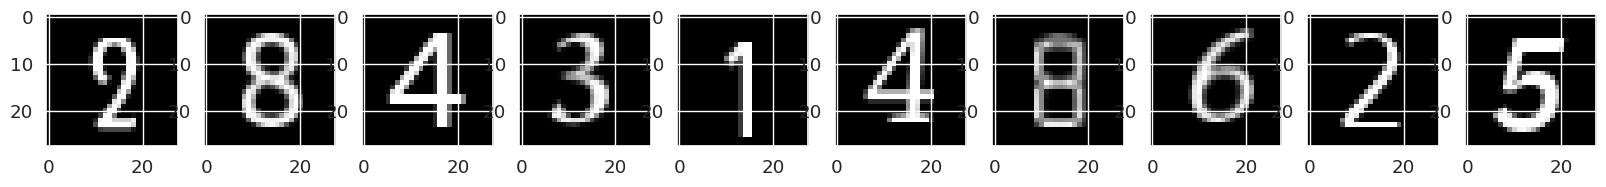

In [56]:
X_images=x.values.reshape(-1,28,28)
f,ax = plt.subplots(1,10,figsize=(20,20))
for i in range(10):
  
  ax[i].imshow(X_images[i], cmap='gray')
plt.show()

the above result shows that we have 29900 digits and 786 is 784 (28X28 pixel image)

**Splitting dataset into Training and Testing**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [58]:
print(f"1. Length of X_train: {X_train.shape} \n2. Length of X_test: {X_test.shape}")

1. Length of X_train: (23920, 784) 
2. Length of X_test: (5980, 784)


In [59]:
print(f"1. Length of y_train: {y_train.shape} \n2. Length of y_test: {y_test.shape}")

1. Length of y_train: (23920, 1) 
2. Length of y_test: (5980, 1)


Converting the dataframes to NumPy arrays 

In [60]:
x=X_train.to_numpy()
y=y_train.to_numpy()
ytest=y_test.to_numpy()
xtest=X_test.to_numpy()

In [61]:
xtest.reshape(5980,28,28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [62]:
x.reshape(23920,28,28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

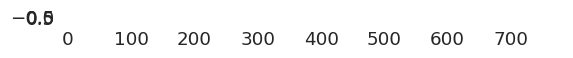

In [63]:
plt.imshow(x[[0]])

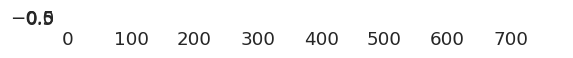

In [64]:
x=tf.keras.utils.normalize(x,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)
plt.imshow(x[[0]],cmap=plt.cm.binary)

**After normalization**

In [65]:
print(x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Checking if there are labels inside the network

In [66]:
print(y[0])

[0]


# Creating a neural network

In [67]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',input_shape = (28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               540900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [69]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y.reshape(-1,1))
y_test_encoded=  enc.transform(ytest.reshape(-1,1))
x.shape

(23920, 784)

In [71]:
x = x.reshape( x.shape[0] , 28,28,1)

In [72]:
print(x.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(23920, 28, 28, 1)
(23920, 10)
(5980, 10)


**Working through the entire training dataset by running it through the learning algorithm 15 times**


In [73]:
running_algo=model.fit(x, y_train_encoded, 
                       epochs=15, validation_data=(x, y_train_encoded), 
                       verbose=1,batch_size=512)

Epoch 1/15
47/47 [==============================] - 16s 334ms/step - loss: 0.7331 - accuracy: 0.8718 - val_loss: 0.2288 - val_accuracy: 0.9416
Epoch 2/15
47/47 [==============================] - 13s 271ms/step - loss: 0.1820 - accuracy: 0.9532 - val_loss: 0.1459 - val_accuracy: 0.9599
Epoch 3/15
47/47 [==============================] - 15s 330ms/step - loss: 0.1298 - accuracy: 0.9668 - val_loss: 0.1167 - val_accuracy: 0.9684
Epoch 4/15
47/47 [==============================] - 15s 322ms/step - loss: 0.1081 - accuracy: 0.9724 - val_loss: 0.0966 - val_accuracy: 0.9747
Epoch 5/15
47/47 [==============================] - 15s 330ms/step - loss: 0.0922 - accuracy: 0.9754 - val_loss: 0.0819 - val_accuracy: 0.9788
Epoch 6/15
47/47 [==============================] - 13s 272ms/step - loss: 0.0810 - accuracy: 0.9784 - val_loss: 0.0753 - val_accuracy: 0.9804
Epoch 7/15
47/47 [==============================] - 12s 256ms/step - loss: 0.0725 - accuracy: 0.9797 - val_loss: 0.0680 - val_accuracy: 0.9822

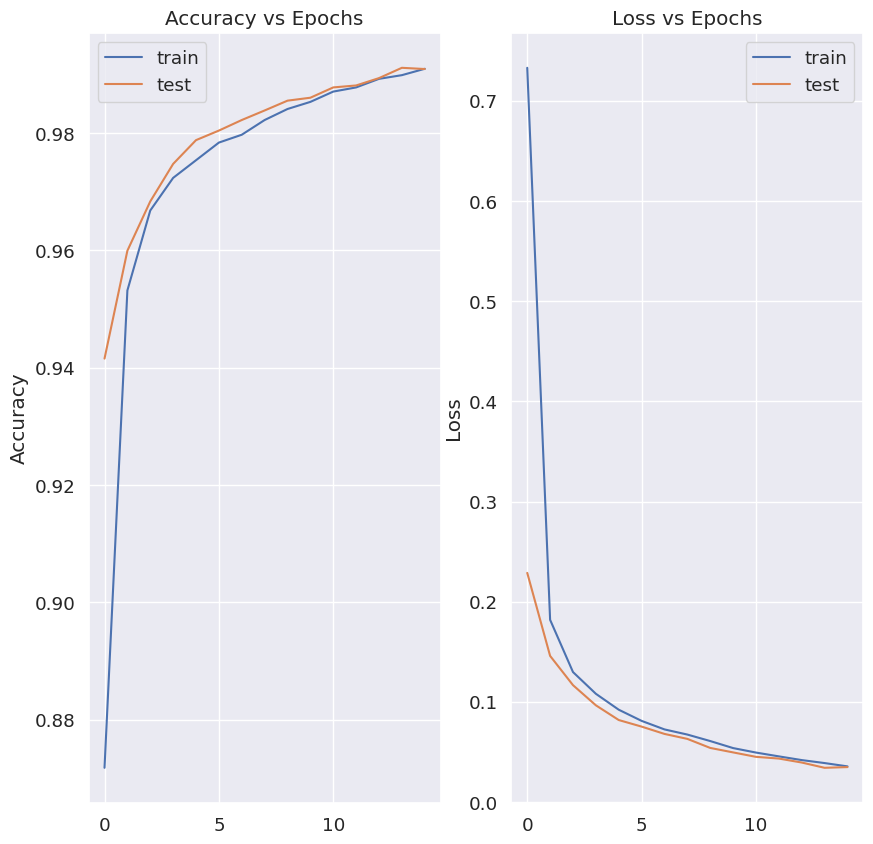

In [74]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
epochs=np.arange(15)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,running_algo.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,running_algo.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,running_algo.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,running_algo.history['val_loss'],label='test')
plt.legend()
plt.show()

**Performing logistic regression as well to compare the results**

In [75]:
mod1=LogisticRegression (solver='lbfgs')
mod1.fit(X_train,y_train)
predictions = mod1.predict(X_test)
score = mod1.score(X_test,y_test)
print(score)

0.9663879598662207


The score above obtained is 96.85% which is the percentage of correct samples over all total samples.

In [77]:
print(f"Accuracy for Train: {accuracy_score(y_train, mod1.predict(X_train))}")
print(f"Accuracy for Test: {accuracy_score(y_test, predictions)}")

Accuracy for Train: 0.9931856187290969
Accuracy for Test: 0.9663879598662207


**Confusion matrix and seaplots**

In [78]:
confusionmatrix =confusion_matrix(y_test, predictions)
print(confusionmatrix)

[[570   0   2   1   1   0   4   0   3   3]
 [  0 599  10   1   5   2   0   3   1   1]
 [  3   7 572   1   0   0   0   1   2   2]
 [  0   4   3 580   0   9   2   0   8   4]
 [  1   4   0   0 581   0   5   0   0   5]
 [  3   0   0   6   1 555  11   0   3   4]
 [  2   1   2   0   2   0 590   0   5   0]
 [  1   9   4   2   0   1   0 591   0   2]
 [  5   1   5   2   1   7   2   2 590   0]
 [  4   0   1   3   2   3   2   3   1 551]]


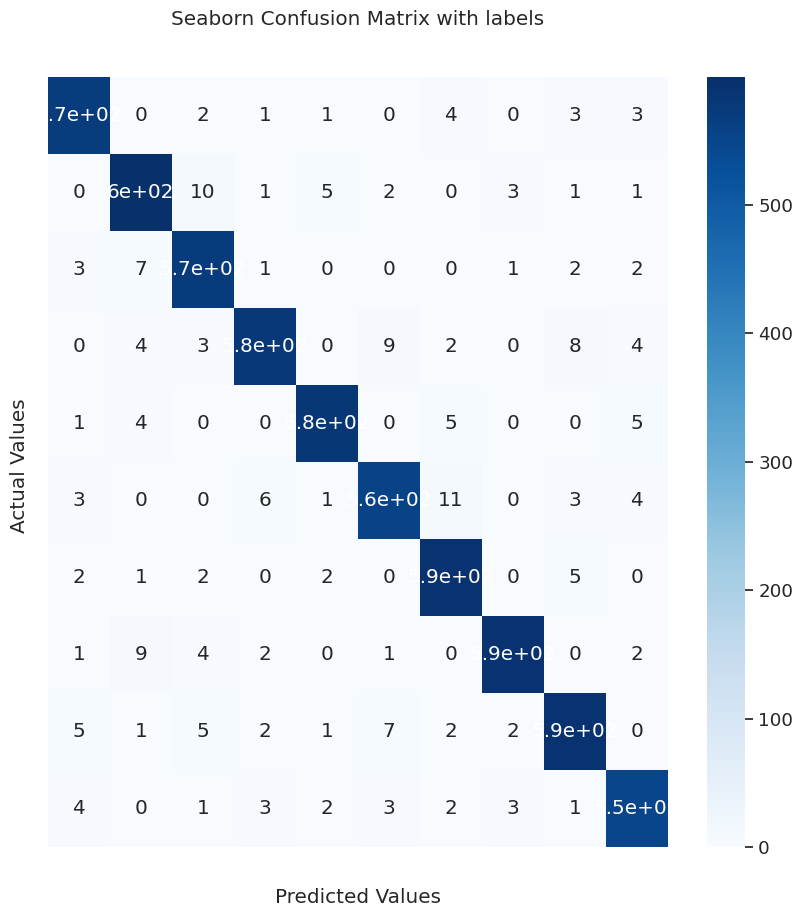

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(confusionmatrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticks([False,True])
ax.yaxis.set_ticks([False,True])

## Display the visualization of the Confusion Matrix.
plt.show()


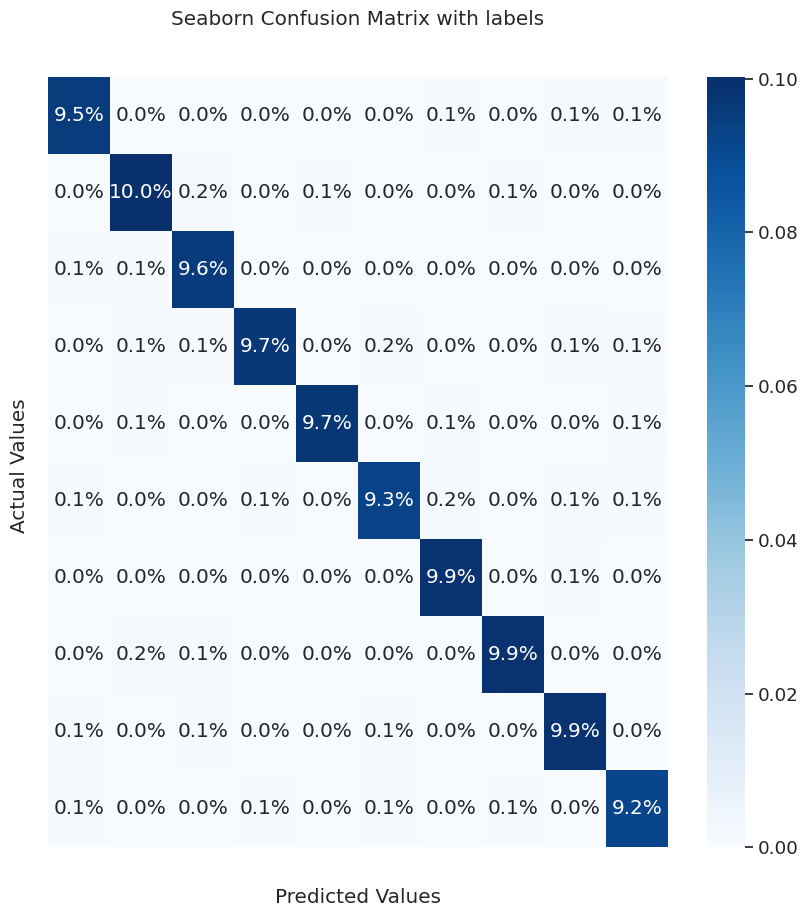

In [80]:
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1 = sns.heatmap(confusionmatrix/np.sum(confusionmatrix), annot=True, 
            fmt='.1%', cmap='Blues')
ax1.set_title('Seaborn Confusion Matrix with labels\n\n');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticks([False,True])
ax1.yaxis.set_ticks([False,True])
plt.show()

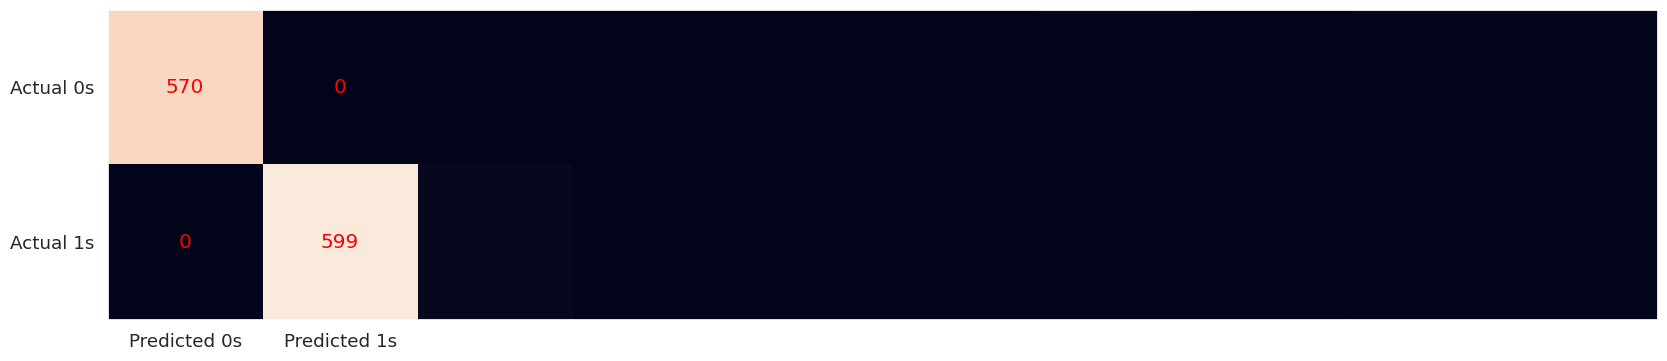

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(confusionmatrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha='center', va='center', color='red')
plt.show()

# CONCLUSION 

1. The model performed pretty fair with prediction accuracy of 99% with simple CNN and 97% with Logistic regression. 
2. The performance was then visualized and explained with help of confusion matrox which explained how well the algorithm performed. It gives the entire summary of the perfomance of a classification algorithm ie approximately 97% accuracy.

## License 

MIT License

Copyright (c) 2023 Jainam Mehta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.